## Model Creation using LSTM and CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import librosa
import math
import os
from tqdm import tqdm

In [3]:
def plot_acc(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='val')
    plt.legend()
    plt.show()
    
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='val')
    plt.legend()
    plt.show()

In [4]:
sample_rate = 22050
num_segments = 10
sample_per_segment = int(sample_rate*30 / num_segments)
print(sample_per_segment)

66150


In [5]:
dataset_dir = "../Data/genres_original/"

In [6]:
file_path = "../Data/genres_original/hiphop/hiphop.00003.wav"
y, sr = librosa.load(file_path, sr=sample_rate)
data = {"labels": [], "mfcc": []}
for n in range(num_segments):
    mfcc = librosa.feature.mfcc(y=y[sample_per_segment*n: sample_per_segment*(n+1)], sr=sample_rate, n_mfcc=40, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
    
    if(len(mfcc) == math.ceil(sample_per_segment / 512)):
        data["mfcc"].append(mfcc.tolist())
        data["labels"].append("hiphop")

In [7]:
metadata = pd.read_csv('../Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
metadata['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [9]:
label_idx = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 
             'reggae': 8, 'rock': 9}

In [10]:
data = {"labels": [], "mfcc": []}
sample_rate = 22050
sample_per_segment = int(sample_rate*30 / num_segments)
for label_idx, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_dir)):
    if(dirpath == dataset_dir):
        continue
    
    for f in tqdm(sorted(filenames)):
        if not f.endswith('.wav'):
            continue
        file_path = str(str(dirpath).split("\\")[-1]) + '/' + str(f)
        
        try:
            y, sr = librosa.load(file_path, sr=sample_rate)
        except:
            continue
        for n in range(num_segments):
            mfcc = librosa.feature.mfcc(y=y[sample_per_segment*n: sample_per_segment*(n+1)], 
                                       sr=sample_rate, n_mfcc=40, n_fft=2048, hop_length=512)
            mfcc = mfcc.T
            if(len(mfcc) == math.ceil(sample_per_segment / 512)):
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(label_idx-1)

 54%|███████████████████████████████████████████▋                                     | 54/100 [00:07<00:06,  7.47it/s]C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.78it/s]


In [11]:
len(data)

2

In [12]:
len(data['mfcc']), len(data['labels'])

(9986, 9986)

In [13]:
x = np.array(data['mfcc'])
y = np.array(data['labels'])

In [14]:
x.shape, y.shape

((9986, 130, 40), (9986,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [17]:
input_shape = (x_train.shape[1], x_train.shape[2])
input_shape

(130, 40)

In [18]:
x_train[0]

array([[-132.94018555,  156.98895264,  -26.53430176, ...,    0.28241968,
           8.06774044,   13.03494835],
       [-113.69397736,  150.76248169,  -29.54515457, ...,   -0.1937992 ,
          10.87521744,   14.12703323],
       [-121.11210632,  144.30157471,  -36.96192169, ...,    0.2736994 ,
          12.07938004,   14.13421535],
       ...,
       [ -47.11247635,  162.32177734,  -57.96706009, ...,  -16.08740997,
          -4.51251793,   -1.12369525],
       [ -24.64901733,  143.41960144,  -39.45771408, ...,  -15.10213566,
          -5.96019363,   -1.08595359],
       [ -41.08190536,  134.81977844,  -24.08997536, ...,   -6.79618263,
          -2.73436403,    0.72074938]])

### Training an LSTM

In [19]:
import tensorflow as tf
from tensorflow.keras import layers 

Base LSTM

In [25]:
model = tf.keras.Sequential()
model.add(layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           26880     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=60, verbose=2)

Epoch 1/60
188/188 - 8s - loss: 1.7544 - accuracy: 0.3572 - val_loss: 1.4718 - val_accuracy: 0.4653 - 8s/epoch - 42ms/step
Epoch 2/60
188/188 - 3s - loss: 1.3931 - accuracy: 0.4879 - val_loss: 1.3552 - val_accuracy: 0.5060 - 3s/epoch - 18ms/step
Epoch 3/60
188/188 - 3s - loss: 1.2095 - accuracy: 0.5507 - val_loss: 1.2057 - val_accuracy: 0.5587 - 3s/epoch - 18ms/step
Epoch 4/60
188/188 - 3s - loss: 1.0669 - accuracy: 0.6163 - val_loss: 1.1009 - val_accuracy: 0.6035 - 3s/epoch - 18ms/step
Epoch 5/60
188/188 - 3s - loss: 0.9262 - accuracy: 0.6668 - val_loss: 1.0324 - val_accuracy: 0.6315 - 3s/epoch - 18ms/step
Epoch 6/60
188/188 - 3s - loss: 0.8314 - accuracy: 0.7139 - val_loss: 1.0305 - val_accuracy: 0.6402 - 3s/epoch - 18ms/step
Epoch 7/60
188/188 - 3s - loss: 0.7368 - accuracy: 0.7439 - val_loss: 0.9791 - val_accuracy: 0.6609 - 3s/epoch - 18ms/step
Epoch 8/60
188/188 - 3s - loss: 0.6610 - accuracy: 0.7703 - val_loss: 0.9015 - val_accuracy: 0.6996 - 3s/epoch - 18ms/step
Epoch 9/60
188/1

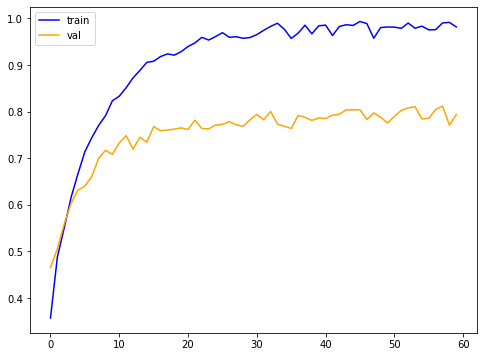

In [36]:
plot_acc(model.history)

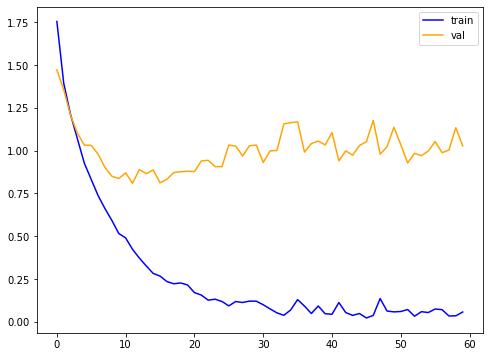

In [37]:
plot_loss(model.history)

In [38]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

79/79 [==============================] - 1s 11ms/step


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
accuracy_score(y_test, y_pred)

0.802963556267521

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       257
           1       0.92      0.90      0.91       258
           2       0.71      0.69      0.70       261
           3       0.70      0.81      0.75       236
           4       0.79      0.78      0.78       238
           5       0.86      0.80      0.83       255
           6       0.94      0.86      0.90       236
           7       0.86      0.82      0.84       250
           8       0.82      0.79      0.80       260
           9       0.67      0.67      0.67       246

    accuracy                           0.80      2497
   macro avg       0.81      0.80      0.80      2497
weighted avg       0.81      0.80      0.80      2497



<AxesSubplot:>

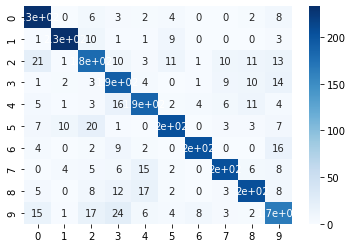

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

Bidirectional LSTM

In [53]:
model = tf.keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=input_shape))
model.add(layers.Bidirectional(layers.LSTM(64)))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 130, 128)         53760     
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [54]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=60, verbose=2)

Epoch 1/60
188/188 - 14s - loss: 1.7575 - accuracy: 0.3637 - val_loss: 1.5933 - val_accuracy: 0.4653 - 14s/epoch - 72ms/step
Epoch 2/60
188/188 - 7s - loss: 1.3602 - accuracy: 0.5039 - val_loss: 1.2563 - val_accuracy: 0.5381 - 7s/epoch - 38ms/step
Epoch 3/60
188/188 - 7s - loss: 1.1551 - accuracy: 0.5722 - val_loss: 1.2412 - val_accuracy: 0.5461 - 7s/epoch - 38ms/step
Epoch 4/60
188/188 - 7s - loss: 0.9994 - accuracy: 0.6400 - val_loss: 1.0381 - val_accuracy: 0.6475 - 7s/epoch - 38ms/step
Epoch 5/60
188/188 - 8s - loss: 0.8433 - accuracy: 0.6979 - val_loss: 1.1314 - val_accuracy: 0.5915 - 8s/epoch - 41ms/step
Epoch 6/60
188/188 - 9s - loss: 0.7547 - accuracy: 0.7356 - val_loss: 0.9520 - val_accuracy: 0.6722 - 9s/epoch - 46ms/step
Epoch 7/60
188/188 - 9s - loss: 0.6432 - accuracy: 0.7782 - val_loss: 0.9186 - val_accuracy: 0.6903 - 9s/epoch - 46ms/step
Epoch 8/60
188/188 - 8s - loss: 0.5412 - accuracy: 0.8179 - val_loss: 0.9137 - val_accuracy: 0.7063 - 8s/epoch - 44ms/step
Epoch 9/60
188

In [55]:
from tensorflow.keras.utils import plot_model

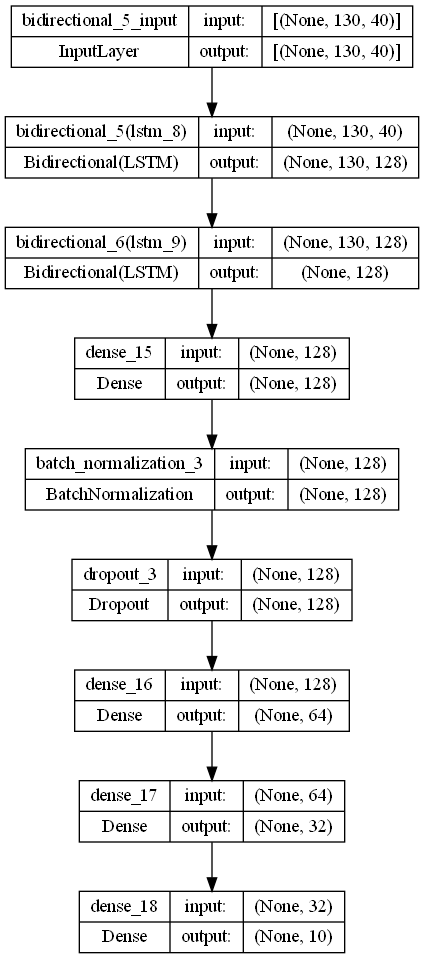

In [56]:
plot_model(model, show_shapes=True, to_file="../Models/Bidirectional_LSTM_arch.png")

In [57]:
model.save('../Models/Bidirectional_LSTM')

INFO:tensorflow:Assets written to: ../Models/Bidirectional_LSTM\assets


INFO:tensorflow:Assets written to: ../Models/Bidirectional_LSTM\assets


## CNN

In [20]:
x = np.array(data['mfcc'])
y = np.array(data['labels'])

x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
y = tf.keras.utils.to_categorical(y, num_classes=10)

In [21]:
x.shape, y.shape

((9986, 130, 40, 1), (9986, 10))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [23]:
y_train[y_train == 10] = 9
y_val[y_val == 10] = 9
y_test[y_test == 10] = 9

In [24]:
input_shape = x_train.shape[1:]

In [25]:
input_shape

(130, 40, 1)

In [26]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=input_shape))
model.add(layers.MaxPooling2D(2, padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(2, padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(2, padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 17, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 9, 128)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 9, 128)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 7, 128)        1

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, verbose=2, batch_size=32)

Epoch 1/40
188/188 - 15s - loss: 0.2633 - accuracy: 0.3772 - val_loss: 0.2133 - val_accuracy: 0.5140 - 15s/epoch - 78ms/step
Epoch 2/40
188/188 - 4s - loss: 0.2021 - accuracy: 0.5390 - val_loss: 0.1888 - val_accuracy: 0.6001 - 4s/epoch - 22ms/step
Epoch 3/40
188/188 - 4s - loss: 0.1831 - accuracy: 0.5896 - val_loss: 0.1758 - val_accuracy: 0.6228 - 4s/epoch - 21ms/step
Epoch 4/40
188/188 - 4s - loss: 0.1617 - accuracy: 0.6538 - val_loss: 0.1481 - val_accuracy: 0.6923 - 4s/epoch - 19ms/step
Epoch 5/40
188/188 - 4s - loss: 0.1470 - accuracy: 0.6880 - val_loss: 0.1552 - val_accuracy: 0.6769 - 4s/epoch - 20ms/step
Epoch 6/40
188/188 - 4s - loss: 0.1341 - accuracy: 0.7186 - val_loss: 0.1486 - val_accuracy: 0.6769 - 4s/epoch - 22ms/step
Epoch 7/40
188/188 - 4s - loss: 0.1242 - accuracy: 0.7496 - val_loss: 0.1330 - val_accuracy: 0.7323 - 4s/epoch - 22ms/step
Epoch 8/40
188/188 - 4s - loss: 0.1176 - accuracy: 0.7666 - val_loss: 0.1125 - val_accuracy: 0.7857 - 4s/epoch - 22ms/step
Epoch 9/40
188

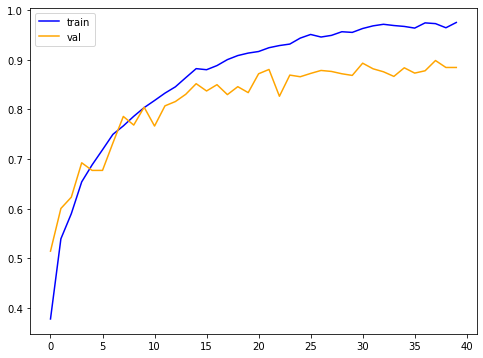

In [28]:
plot_acc(history)

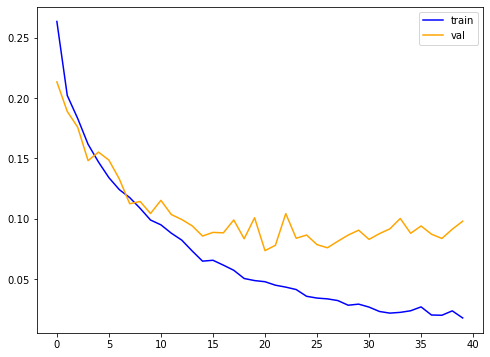

In [29]:
plot_loss(history)

In [30]:
model.save('../Models/CNN_88')

INFO:tensorflow:Assets written to: ../Models/CNN_88\assets


INFO:tensorflow:Assets written to: ../Models/CNN_88\assets


In [31]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

79/79 [==============================] - 1s 9ms/step


In [38]:
y_test = np.argmax(y_test, axis=1)

In [39]:
print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 0.8826591910292351


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       246
           1       0.91      0.99      0.95       236
           2       0.85      0.84      0.85       237
           3       0.81      0.92      0.86       253
           4       0.94      0.85      0.89       262
           5       0.87      0.90      0.89       243
           6       0.94      0.92      0.93       243
           7       0.95      0.84      0.89       253
           8       0.90      0.86      0.88       277
           9       0.76      0.81      0.78       247

    accuracy                           0.88      2497
   macro avg       0.89      0.88      0.88      2497
weighted avg       0.89      0.88      0.88      2497



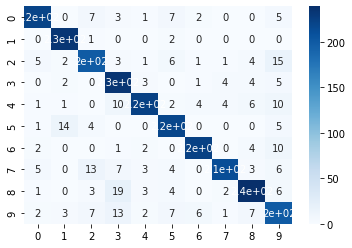

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues');

### Residual Modules

In [19]:
def identity_block(x, filter):
    x_skip = x

    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [20]:
def convolutional_block(x, filter):
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [93]:
def ResNet34(shape = input_shape, classes = 10):
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    block_layers = [1, 1, 1, 1]
    filter_size = 64
    for i in range(4):
        if i == 0:
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
                
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
inputs = layers.Input(input_shape)
x = layers.ZeroPadding2D((3, 3))(inputs)
x = layers.Conv2D(64, kernel_size=7, stides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = identity_block(x, 32)
x = convolutional_block(x, 64)
x = identity_block(x, 64)
x = convolutional_block(x, 128)
x = identity_block(x, 128)
x = convolutional_block(x, 64)
x = identity_block(x, 64)

x = layers.AveragePooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)

x = layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")

In [94]:
model = ResNet34()
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 130, 40, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 136, 46, 1)  0           ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_119 (Conv2D)            (None, 68, 23, 64)   3200        ['zero_padding2d_4[0][0]']       
                                                                                           

 Normalization)                                                                                   
                                                                                                  
 conv2d_130 (Conv2D)            (None, 5, 2, 512)    131584      ['activation_108[0][0]']         
                                                                                                  
 add_52 (Add)                   (None, 5, 2, 512)    0           ['batch_normalization_116[0][0]',
                                                                  'conv2d_130[0][0]']             
                                                                                                  
 activation_110 (Activation)    (None, 5, 2, 512)    0           ['add_52[0][0]']                 
                                                                                                  
 average_pooling2d_4 (AveragePo  (None, 3, 1, 512)   0           ['activation_110[0][0]']         
 oling2D) 

In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, verbose=2, batch_size=32)

Epoch 1/40
188/188 - 8s - loss: 0.2336 - accuracy: 0.4645 - val_loss: 0.3888 - val_accuracy: 0.4399 - 8s/epoch - 44ms/step
Epoch 2/40
188/188 - 5s - loss: 0.1696 - accuracy: 0.6335 - val_loss: 0.2547 - val_accuracy: 0.5601 - 5s/epoch - 27ms/step
Epoch 3/40
188/188 - 5s - loss: 0.1493 - accuracy: 0.6850 - val_loss: 0.2464 - val_accuracy: 0.5694 - 5s/epoch - 27ms/step
Epoch 4/40
188/188 - 5s - loss: 0.1286 - accuracy: 0.7308 - val_loss: 0.2694 - val_accuracy: 0.5007 - 5s/epoch - 27ms/step
Epoch 5/40
188/188 - 5s - loss: 0.1136 - accuracy: 0.7685 - val_loss: 0.1933 - val_accuracy: 0.6395 - 5s/epoch - 28ms/step
Epoch 6/40
188/188 - 6s - loss: 0.1025 - accuracy: 0.7954 - val_loss: 0.1836 - val_accuracy: 0.6602 - 6s/epoch - 29ms/step
Epoch 7/40
188/188 - 6s - loss: 0.0860 - accuracy: 0.8269 - val_loss: 0.0939 - val_accuracy: 0.8104 - 6s/epoch - 30ms/step
Epoch 8/40
188/188 - 6s - loss: 0.0823 - accuracy: 0.8421 - val_loss: 0.1230 - val_accuracy: 0.7737 - 6s/epoch - 30ms/step
Epoch 9/40
188/1

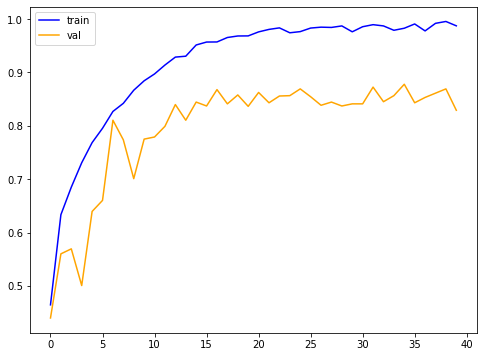

In [97]:
plot_acc(model.history)

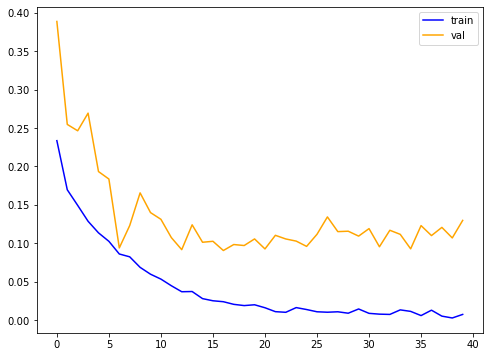

In [98]:
plot_loss(model.history)

### Transfer Learning

In [17]:
from tensorflow.keras.applications import VGG16, InceptionV3

In [18]:
x.shape

(9986, 130, 40)

In [19]:
x_reshaped = np.expand_dims(x, -1)
x_reshaped.shape

(9986, 130, 40, 1)

In [20]:
x_reshaped = x_reshaped.repeat(3, axis=-1)
x_reshaped.shape

(9986, 130, 40, 3)

In [21]:
y.shape

(9986,)

In [24]:
y = tf.keras.utils.to_categorical(y, num_classes=10)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [26]:
x_train.shape, y_train.shape

((6390, 130, 40, 3), (6390, 10))

In [27]:
base_model = VGG16(input_shape=(130, 40, 3), include_top=False, weights="imagenet")
base_model.trainable = False

In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 130, 40, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 130, 40, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 130, 40, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 65, 20, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 65, 20, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 65, 20, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 10, 128)       0     

In [32]:
inputs = layers.Input(shape=(130, 40, 3))
x = base_model(inputs, training=False)
x = layers.Conv2D(64, (5, 5), padding='same')(x)
x = layers.Conv2D(64, (3, 3), padding='same')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

outputs = layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 130, 40, 3)]      0         
                                                                 
 vgg16 (Functional)          (None, 4, 1, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 1, 64)          819264    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 1, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                           

In [33]:
model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=32, epochs=50, verbose=2)

Epoch 1/50
200/200 - 13s - loss: 0.4807 - accuracy: 0.2740 - val_loss: 0.2721 - val_accuracy: 0.3811 - 13s/epoch - 65ms/step
Epoch 2/50
200/200 - 11s - loss: 0.2562 - accuracy: 0.4020 - val_loss: 0.2388 - val_accuracy: 0.4193 - 11s/epoch - 56ms/step
Epoch 3/50
200/200 - 12s - loss: 0.2323 - accuracy: 0.4598 - val_loss: 0.2099 - val_accuracy: 0.5044 - 12s/epoch - 58ms/step
Epoch 4/50
200/200 - 11s - loss: 0.2189 - accuracy: 0.4978 - val_loss: 0.2315 - val_accuracy: 0.4643 - 11s/epoch - 57ms/step
Epoch 5/50
200/200 - 11s - loss: 0.2124 - accuracy: 0.5172 - val_loss: 0.2163 - val_accuracy: 0.5144 - 11s/epoch - 57ms/step
Epoch 6/50
200/200 - 11s - loss: 0.2024 - accuracy: 0.5521 - val_loss: 0.2012 - val_accuracy: 0.5501 - 11s/epoch - 57ms/step
Epoch 7/50
200/200 - 11s - loss: 0.1982 - accuracy: 0.5526 - val_loss: 0.2028 - val_accuracy: 0.5325 - 11s/epoch - 57ms/step
Epoch 8/50
200/200 - 11s - loss: 0.1939 - accuracy: 0.5696 - val_loss: 0.1972 - val_accuracy: 0.5494 - 11s/epoch - 57ms/step
